In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
file_path = 'data/experiment-redgreenlight.csv'
df = pd.read_csv(file_path)

# 使用numpy分割数据框
num_cols = df.shape[1]
split_dfs = np.split(df, num_cols // 4, axis=1)

# 删除每组的第一个元素（列）
split_dfs = [df_group.drop(df_group.columns[0], axis=1) for df_group in split_dfs]

# 创建一个字典，将键从20分配给每个组,观测范围
result_dict = {}
key_start = 0

for i, split_df in enumerate(split_dfs):
    # 将数据框转换为列表形式
    split_list = split_df.values.tolist()
    # 将列表存储到字典中
    key = key_start + i
    key_r = round(key,2)
    result_dict[key_r] = split_list

# 显示最终字典
print(result_dict)

{0: [[23, 0, 13]], 1: [[17, 0, 15]], 2: [[20, 0, 12]], 3: [[10, 0, 7]], 4: [[15, 0, 7]], 5: [[26, 1, 13]], 6: [[11, 1, 10]], 7: [[6, 0, 11]], 8: [[8, 0, 9]], 9: [[13, 0, 6]], 10: [[15, 0, 4]], 11: [[16, 0, 7]], 12: [[13, 0, 2]], 13: [[13, 0, 4]], 14: [[9, 0, 8]], 15: [[11, 0, 8]], 16: [[7, 0, 11]], 17: [[10, 0, 5]], 18: [[5, 0, 1]], 19: [[16, 0, 17]], 20: [[3, 0, 19]], 21: [[12, 1, 8]], 22: [[12, 2, 4]], 23: [[14, 0, 7]], 24: [[15, 0, 9]], 25: [[10, 0, 19]], 26: [[8, 1, 10]], 27: [[15, 0, 3]], 28: [[20, 1, 6]], 29: [[9, 1, 4]], 30: [[12, 0, 6]], 31: [[13, 0, 4]], 32: [[16, 0, 9]], 33: [[12, 0, 10]], 34: [[12, 0, 10]], 35: [[13, 0, 5]], 36: [[6, 0, 5]], 37: [[8, 0, 4]], 38: [[13, 0, 20]], 39: [[14, 1, 12]], 40: [[13, 0, 10]], 41: [[11, 0, 10]], 42: [[8, 1, 10]], 43: [[11, 1, 9]], 44: [[7, 2, 17]], 45: [[14, 0, 9]], 46: [[17, 1, 3]], 47: [[15, 0, 7]], 48: [[8, 0, 6]], 49: [[5, 0, 7]], 50: [[10, 0, 3]], 51: [[7, 0, 1]], 52: [[7, 0, 5]], 53: [[4, 0, 5]], 54: [[9, 0, 7]], 55: [[5, 0, 5]], 5

/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
# 提取x轴（keys）和y轴（每个list的第二个元素）
x_values = list(result_dict.keys())
y_values = [value[0][1] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y_values)

# 提取y轴（每个list的第3个元素）
y2_values = [value[0][2] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y2_values)

In [7]:
# 初始化列表
red = []

# 生成后续的数字列表
for num in range(10, 100 + 1, 5):
    red.extend([num] * 19)

# 打印结果列表
print(red)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 75, 75, 75,

In [8]:
# 初始化列表
green = []

# 生成后续的数字列表
for _ in range(19):
    green.extend([10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])

# 打印结果列表
print(green)

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100

In [9]:
data = {
    'red':red,
    'green':green,
    'j-noInView':y_values,
    'j-calc':y2_values
}
df = pd.DataFrame(data)
df

,red,green,j-noInView,j-calc
0,10,10,0,13
1,10,15,0,15
2,10,20,0,12
3,10,25,0,7
4,10,30,0,7
...,...,...,...,...
356,100,80,0,19
357,100,85,0,16
358,100,90,1,15
359,100,95,1,19


回归系数: [ 0.00506002 -0.01835642]
截距: 1.4515235457063715
R²: 0.23220671428259376


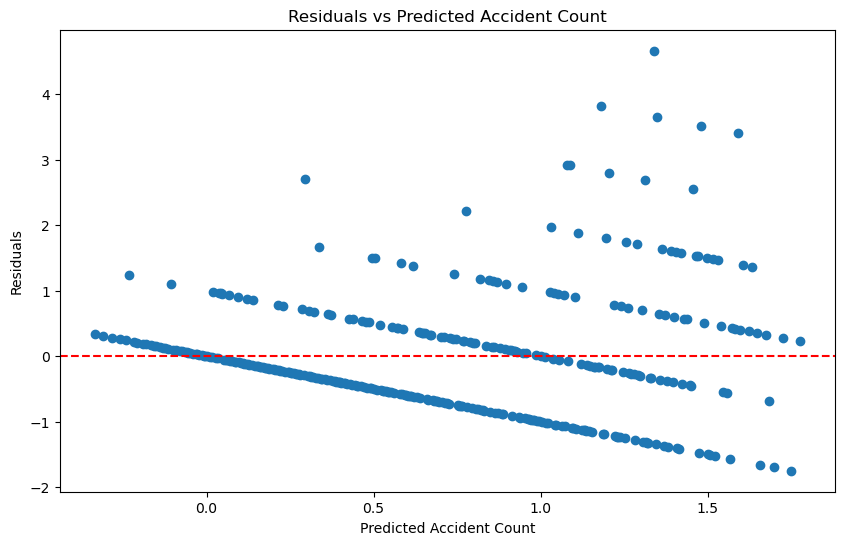

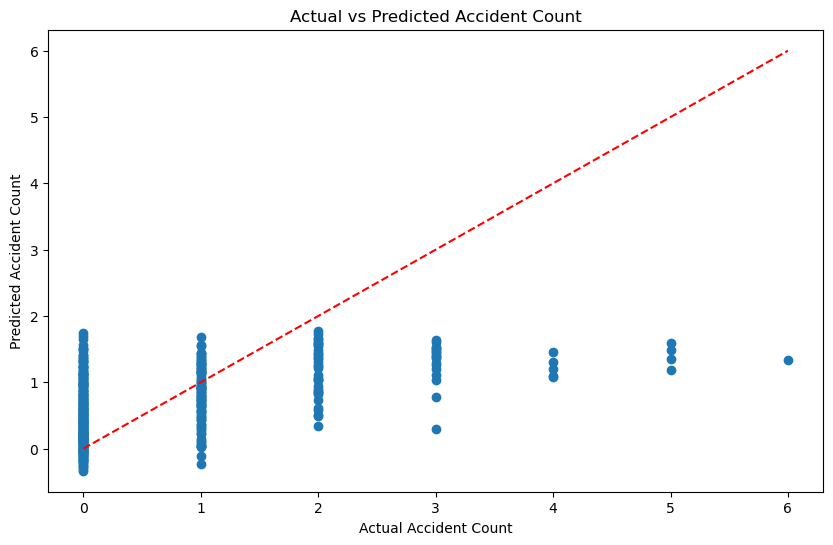

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


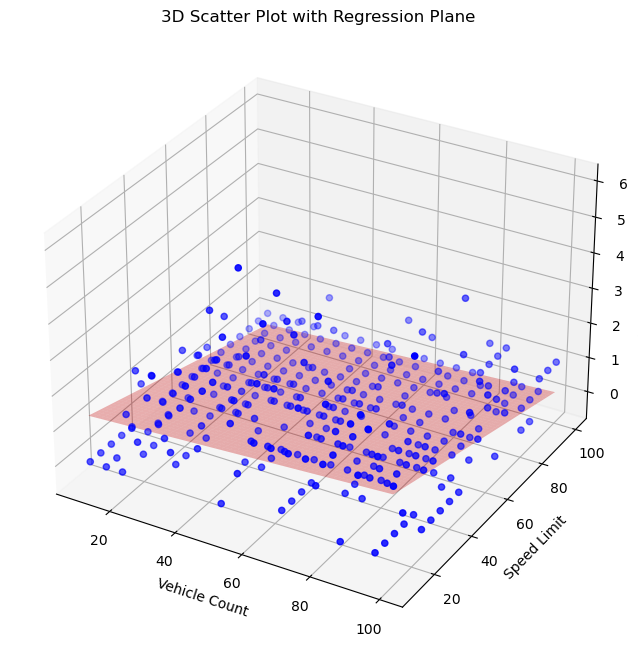

In [12]:
# 自变量 (X) 和 因变量 (y)
X = df[['red', 'green']]
y = df['j-noInView']

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X, y)

# 预测结果
y_pred = model.predict(X)

# 输出回归系数
print("回归系数:", model.coef_)
print("截距:", model.intercept_)

# 评估模型
r2 = r2_score(y, y_pred)
print("R²:", r2)

# 1. 残差图
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Accident Count')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Accident Count')
plt.show()

# 2. 实际值 vs 预测值图
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Accident Count')
plt.ylabel('Predicted Accident Count')
plt.title('Actual vs Predicted Accident Count')
plt.show()

# 3. 3D散点图与回归平面
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(df['red'], df['green'], y, color='blue', label='Actual')

# 绘制回归平面
x_surf, y_surf = np.meshgrid(np.linspace(df['red'].min(), df['red'].max(), 100),
                             np.linspace(df['green'].min(), df['green'].max(), 100))
z_surf = model.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel('Vehicle Count')
ax.set_ylabel('Speed Limit')
ax.set_zlabel('Accident Count')
ax.set_title('3D Scatter Plot with Regression Plane')
plt.show()

In [17]:
red_values = df['red'].unique()
red_values

array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100])

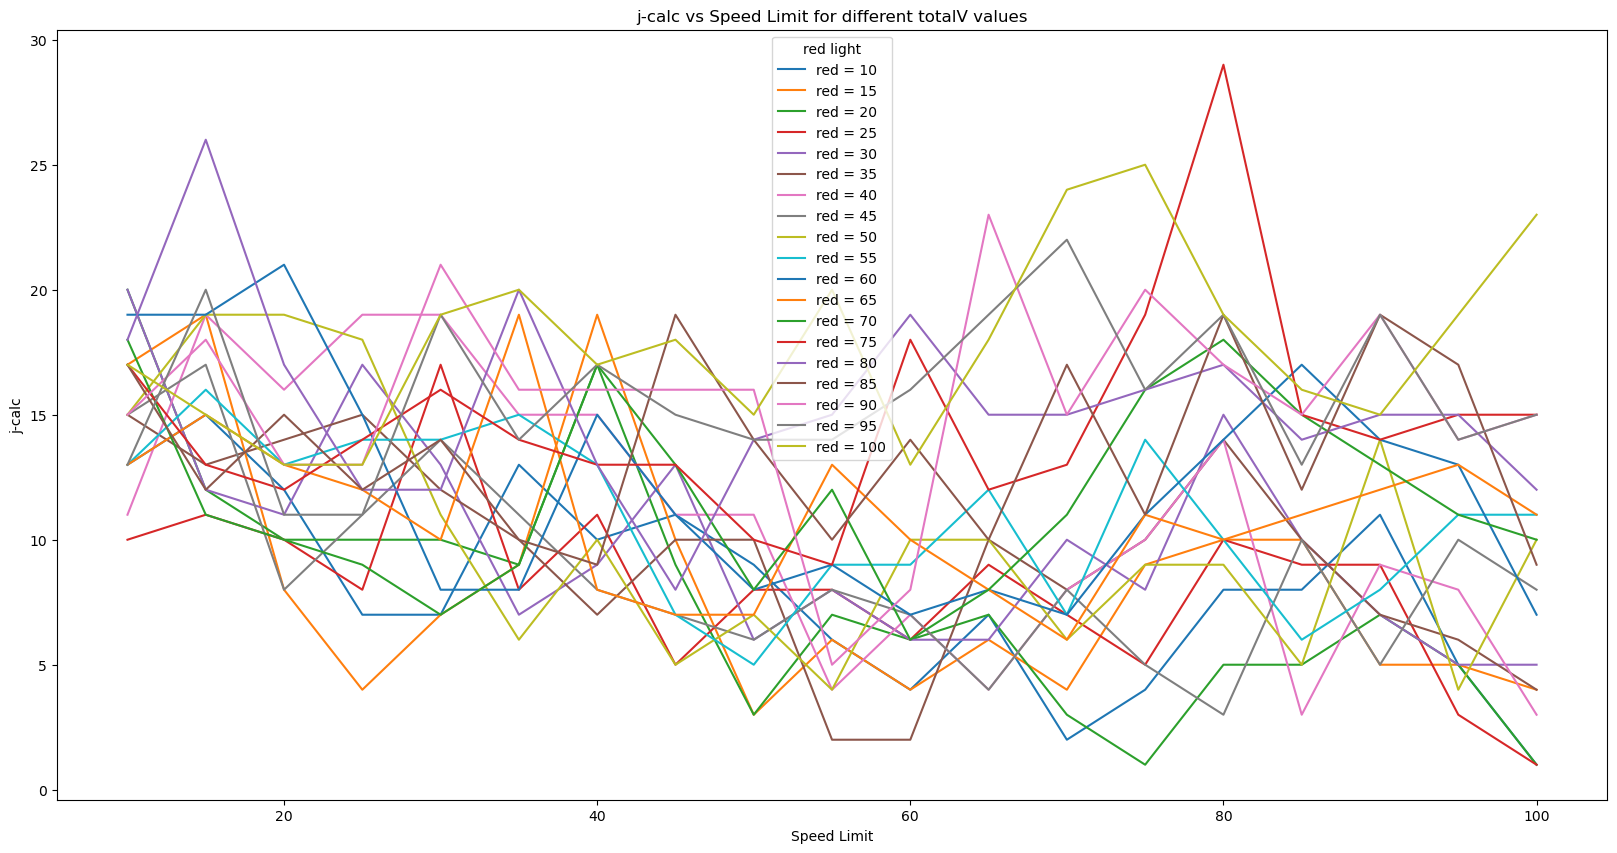

In [23]:
# 绘制图表
plt.figure(figsize=(20, 10))

for V in red_values:
    # 筛选出每个 totalV 对应的数据
    subset = df[df['red'] == V]
    
    # 绘制折线图
    plt.plot(subset['green'], subset['j-calc'], marker='', label=f'red = {V}')

# 添加图表标签和标题
plt.xlabel('Speed Limit')
plt.ylabel('j-calc')
plt.title('j-calc vs Speed Limit for different totalV values')
plt.legend(title='red light')

# 显示图表
plt.show()